# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can
calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they
may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your
follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins,
comes a few times, then disappears, they're unlikely to come back. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention
strategy.

You should:
 - Learn to predict the probability of churn (for the upcoming month) for each customer
 - Draw up typical user portraits: select the most outstanding groups and describe their main features
 - Analyze the factors that impact churn most
 - Draw basic conclusions and develop recommendations on how to improve customer service:
     - Identify target groups
     - Suggest measures to cut churn
     - Describe any other patterns you see with respect to interaction with customers


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Model-(Churn)" data-toc-modified-id="Model-(Churn)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model (Churn)</a></span></li><li><span><a href="#User-clusters" data-toc-modified-id="User-clusters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>User clusters</a></span></li><li><span><a href="#Conclusion-and-Recomendation" data-toc-modified-id="Conclusion-and-Recomendation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion and Recomendation</a></span></li></ul></div>

# Initialization

Import all libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Data preparation

Load the data

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

Review data

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
gym.duplicated().sum()

0

In [7]:
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Explanation**

- no any missing feature 
- mean Avg_class_frequency_total and Avg_class_frequency_current_month	show that customer visit per week around 1 or 2 times per week.



Lets look at the mean feature values in two groups: 

    - for those who left (churn) 
    - for those who stayed.

# EDA

In [9]:
gym['Churn'].unique()

array([0, 1], dtype=int64)

In [10]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Summary**

- Customer gender show that both gender who stay and left have the same average.
- Customer who near to the gym tends to stay and to leave. 
- 0.53 user is an employee of a partner company stayed while only 0.35 employee of a partner company leave.
- 0.35 user who stay used promo while 0.18 user who used promo who leave.
- majority (0.9 from 1) user provided phone number who stay and leave.
- average contract period user that stay is 6 years rounded while average contract period who leave is 2 years rounded.
- average user who join group sessions who stay is 0.46 while user who leave is 0.26
- average age user who stay are 30 while average user who leave are 27
- average additional charges total for use who stay is 158.44 while user who leave is 115.08
- month to end contract user who stay is 5 months and user who leave is 1 months
- average user lifetime who stay is 4 years and users who leave is 1 years. 
- average class frequency per week for users who stay is 2 times per week and users who leave is 1.47 times per week.
- average class frequency per month for users who stay is 2 times per week and users who leave is 1.04 times per week.

Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

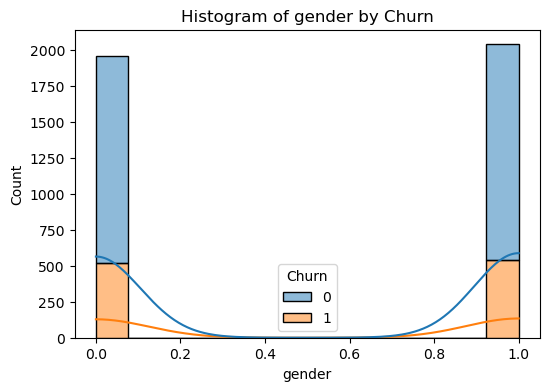

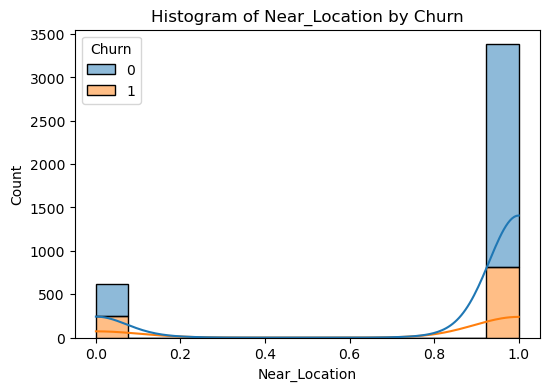

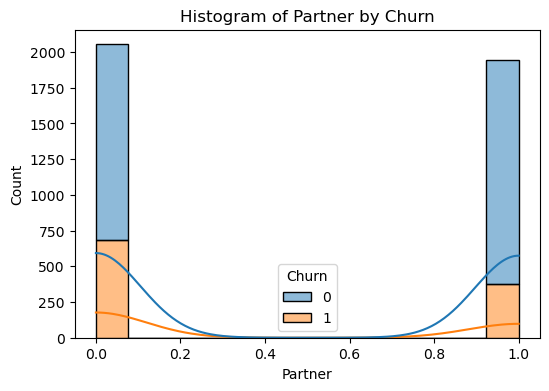

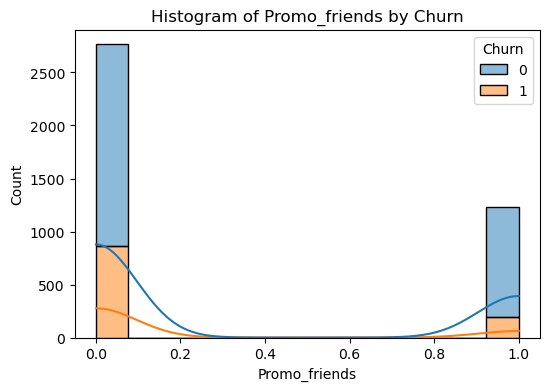

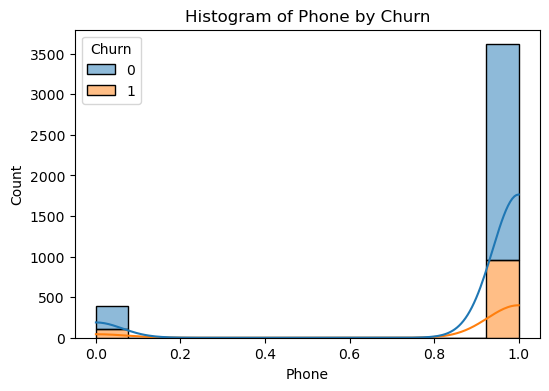

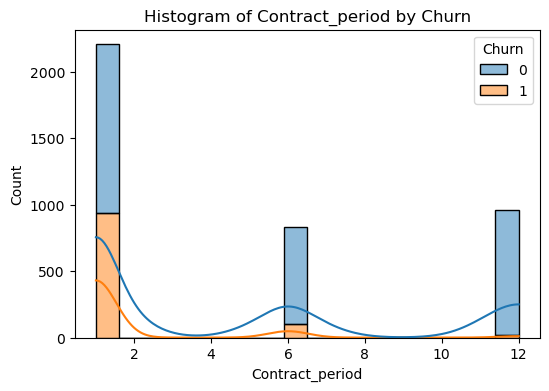

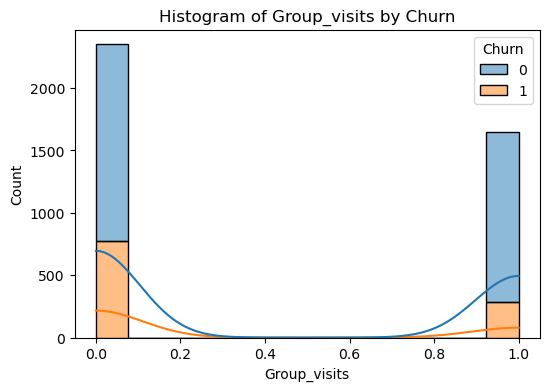

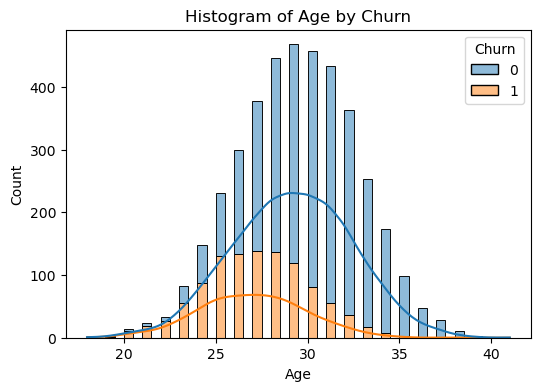

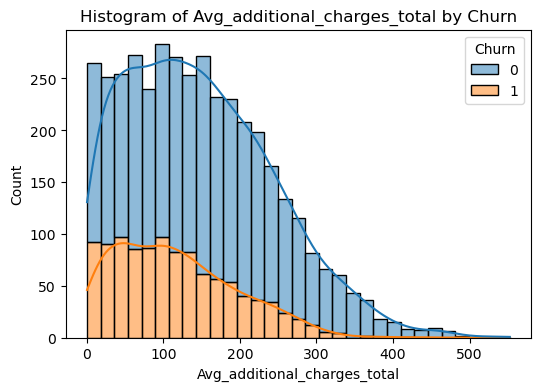

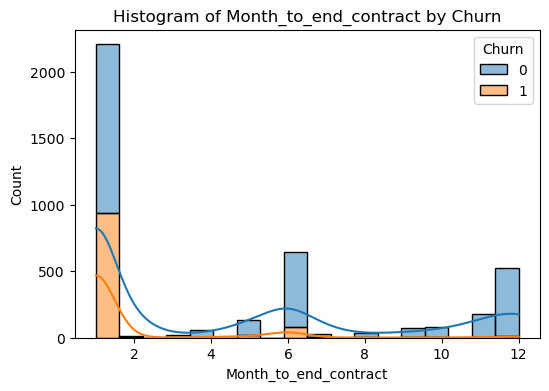

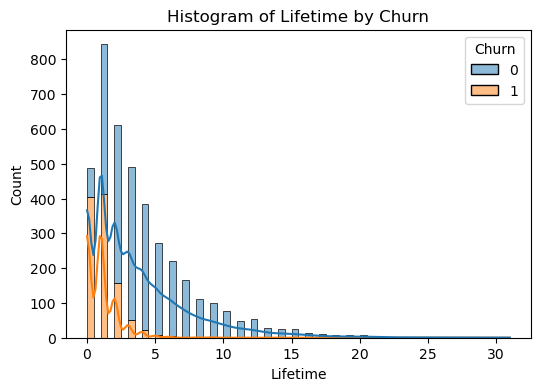

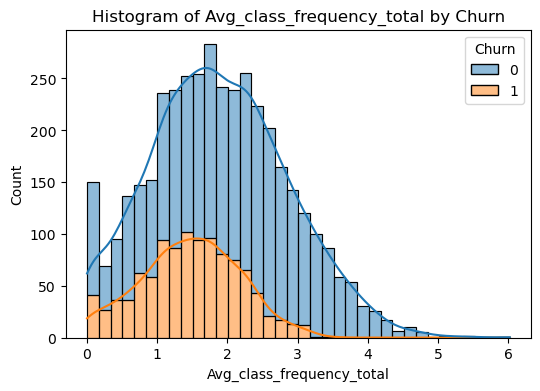

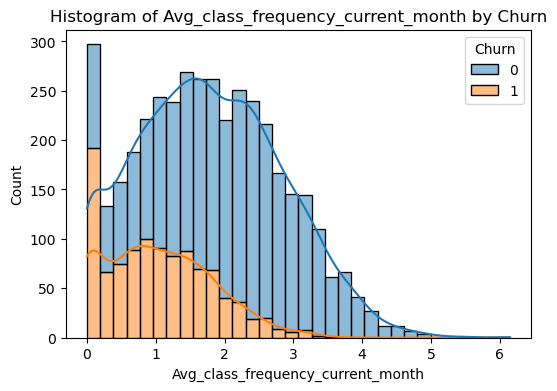

In [11]:
# Get the list of column names, excluding Churn
col_names = [col for col in gym.columns if col != 'Churn']

# Loop through each column and create a histogram with hue=Churn

for col in col_names:
    fig = plt.subplots(figsize =(6, 4))
    sns.histplot(data=gym, x=col, hue='Churn',kde=True,multiple='stack', alpha=0.5)
    plt.title(f'Histogram of {col} by Churn')
    plt.show()


**Summary**

All the features have almost the same KDE pattern for users who stay and user who leave except feature users age. User who young tends to leave while users who in middle age (28 -30 years old) tends to stay. This can be used as a sign for target market.


Lets see the correlation matrix 

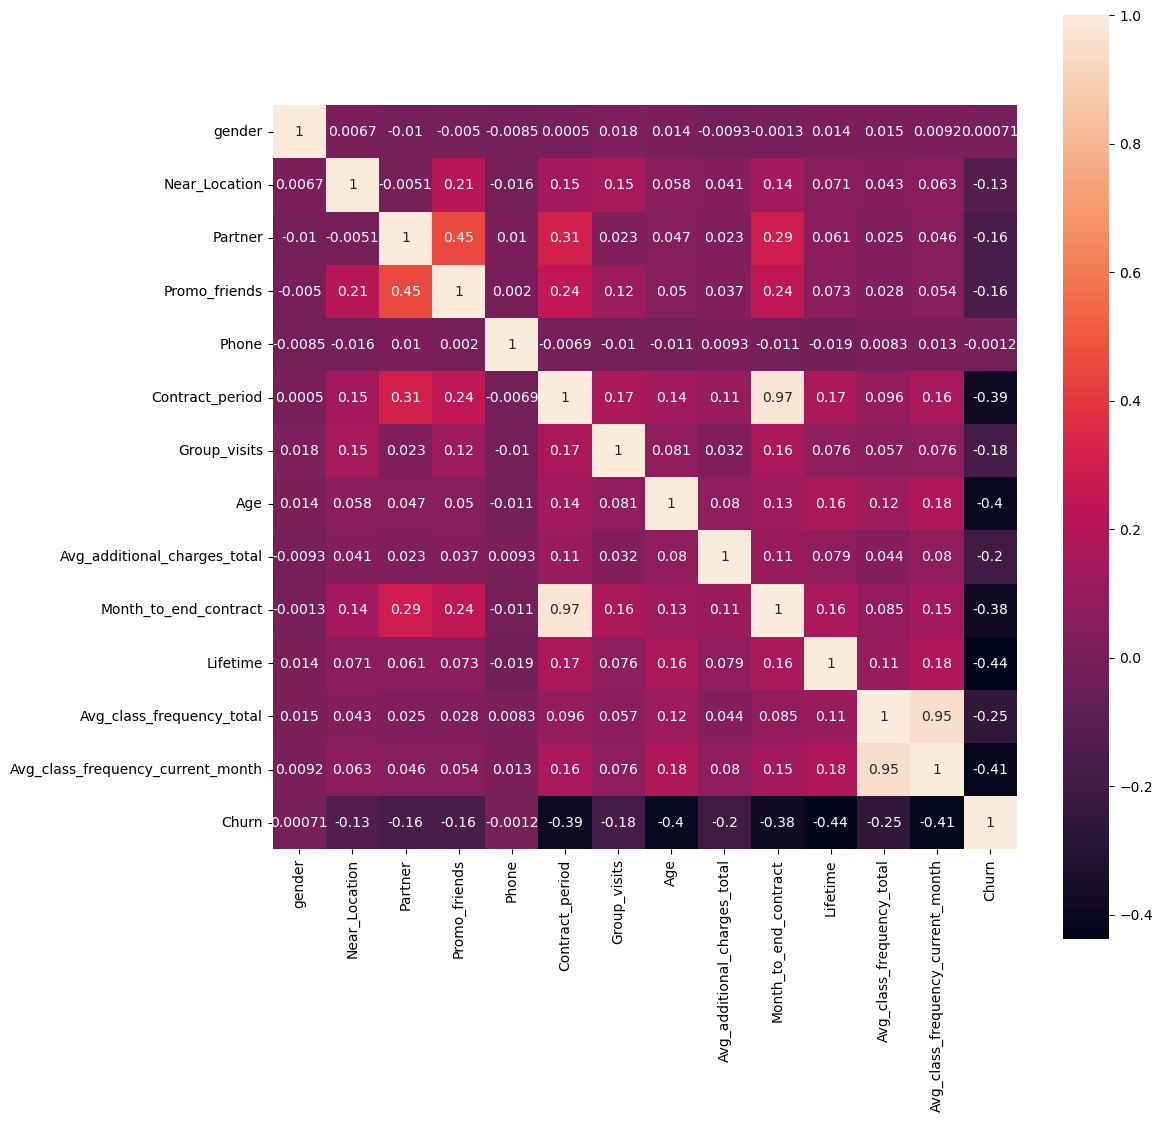

In [12]:
# build and render a correlation matrix
cm = gym.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize =(12, 12))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square=True) 
plt.show()

**Summary**

From the heatmap, all the features except gender who give the negative impact with the target variable(Churn). It means if the features increase, the churn will decrease. The contract_period, age, month_to_end_contract, avg_class_frequency_current_month features give the big negative impact for the churn. 

# Model (Churn)

Lets build a binary classification model for customers where the target feature is the user's leaving next month.

Divide the data into train and validation sets using the train_test_split() function.

In [13]:
gyms = pd.get_dummies(gym)
gyms.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [14]:
# divide the data into features (the X matrix) and a target variable (y)
X = gyms.drop('Churn', axis = 1) 
y = gyms['Churn']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

Train the model on the train set with two methods:
 - logistic regression
 -  random forest

In [15]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state = 0)

# train the random forest model
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)  
lr_probabilities = lr_model.predict_proba(X_test)[:,1]                                

In [16]:
# define the algorithm for the new random forest model
rf_model =  RandomForestClassifier(n_estimators = 100,random_state = 0) 

# train the random forest model
rf_model.fit(X_train, y_train)

# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test)  
rf_probabilities = rf_model.predict_proba(X_test)[:,1] 

Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [18]:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.79


In [19]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


**Summary**

The random forest model seems to perform slightly better than the logistic regression model on the validation data. This is because the random forest model has higher accuracy, precision, and recall scores compared to the logistic regression model. However, the difference in performance between the two models is relatively small, and further analysis may be necessary to determine which model is truly better for the specific task at hand.

# User clusters

 lets standardize the data.

In [20]:
# train StandardScaler on the train set
scaler = StandardScaler()
x_sc = scaler.fit_transform(gym.drop(columns = ['Churn']))

Then, Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

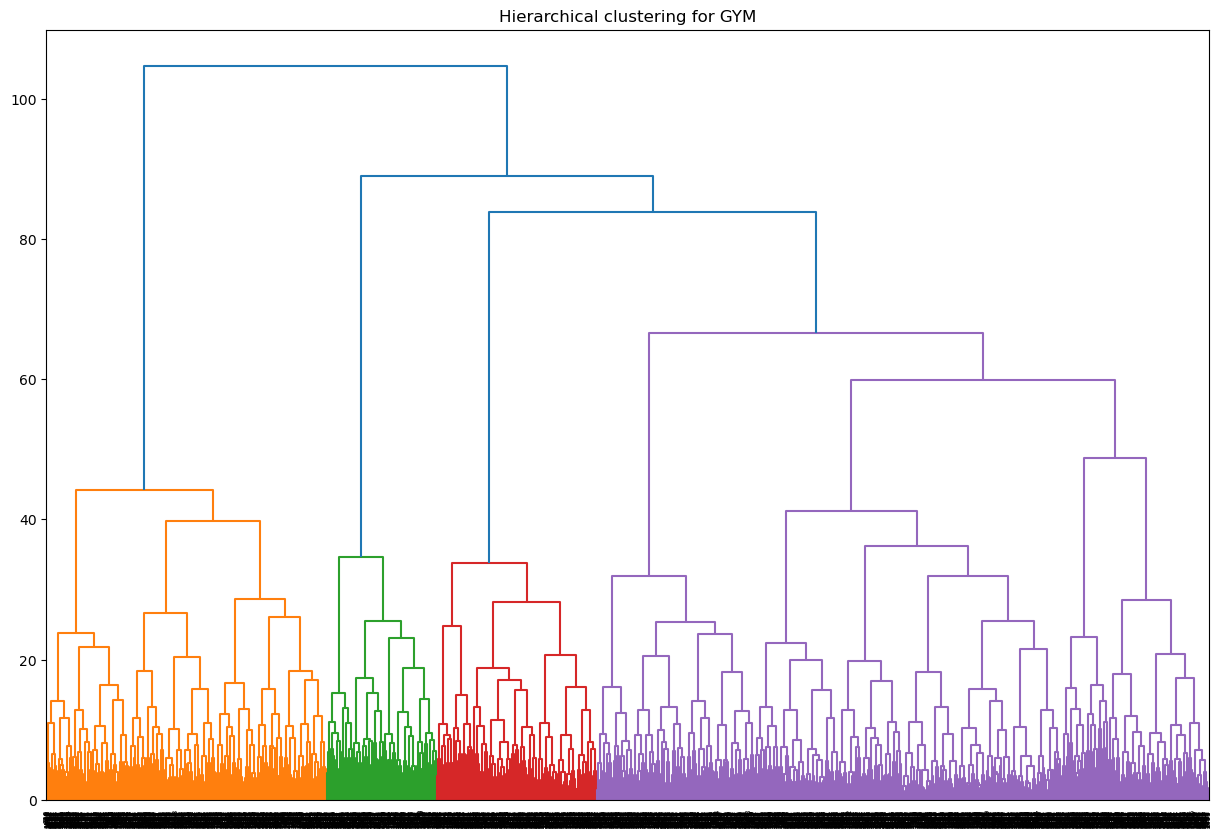

In [21]:
# perform hierarchical clustering
Z = linkage(x_sc, method='ward')

# plot dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(Z, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

Train the clustering model with the K-means algorithm and predict customer clusters. Let the number of clusters be n=5.

In [22]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations 
labels = km.fit_predict(x_sc)

In [23]:
gym['cluster_km'] = labels

In [24]:
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.00000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.485692,1.000000,0.351351,0.240064,1.00000,1.951510,0.339428,28.171701,131.683291,1.859300,2.425278,1.245607,1.010188,0.515898
2,0.560714,0.976190,0.353571,0.228571,0.99881,2.646429,0.477381,30.120238,161.391936,2.441667,4.925000,2.844330,2.842234,0.067857
3,0.501484,0.960435,0.784372,0.575668,1.00000,10.884273,0.541048,29.976261,160.840464,9.946588,4.723046,1.987263,1.980273,0.027695
4,0.496047,0.000000,0.462451,0.079051,1.00000,2.371542,0.217391,28.476285,135.404537,2.217391,2.816206,1.659219,1.476397,0.442688


**Summary**

Near_Location:
- Cluster 4 has a mean value of 0.0 for this feature, which means that the members in this cluster are least likely to live  near the gym location.

Group_visits:
- Cluster 3 has the highest mean value for this feature at 0.54, which means that the members in this cluster are more likely to participate in group classes.

Age:
- Cluster 2 has the highest mean age at 30.12, while cluster 1 has the lowest mean age at 28.17.

Contract_period:
- Cluster 3 has the highest mean value for this feature at 10.88, which means that the members in this cluster are more likely to have long-term contracts.

Churn:
- Cluster 1 has the highest churn rate at 0.51, while cluster 3 has the lowest churn rate at 0.03, indicating that the members in cluster 3 are more likely to remain gym members.

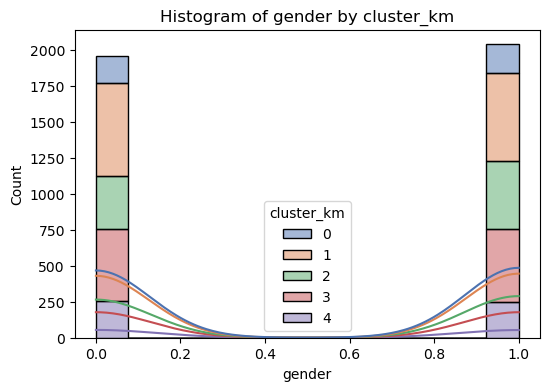

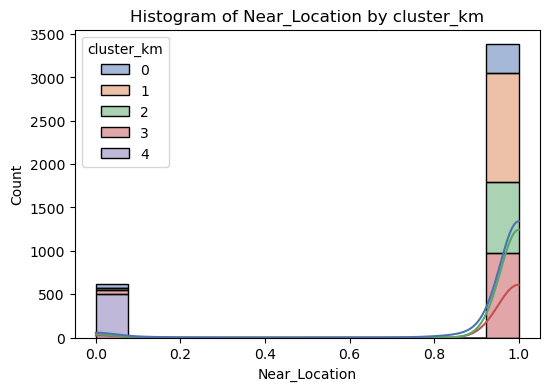

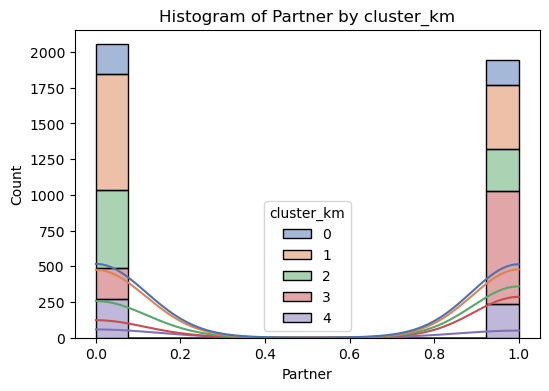

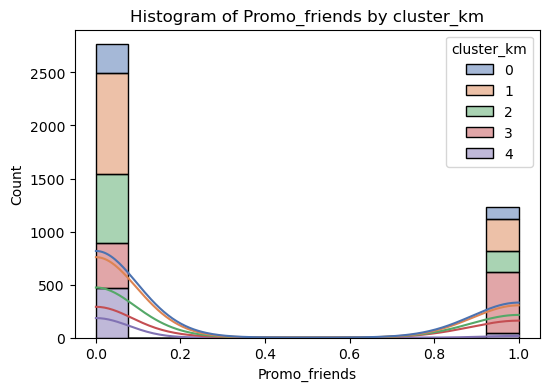

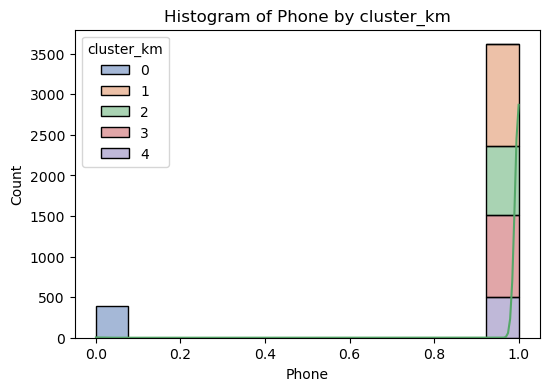

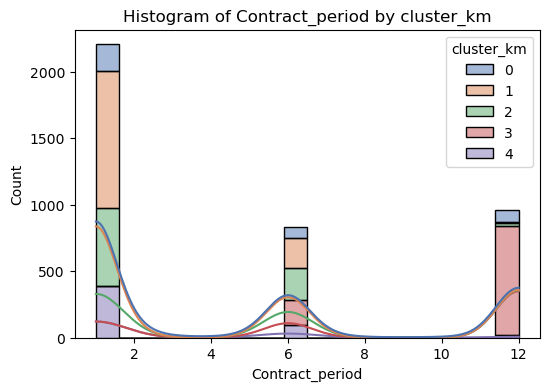

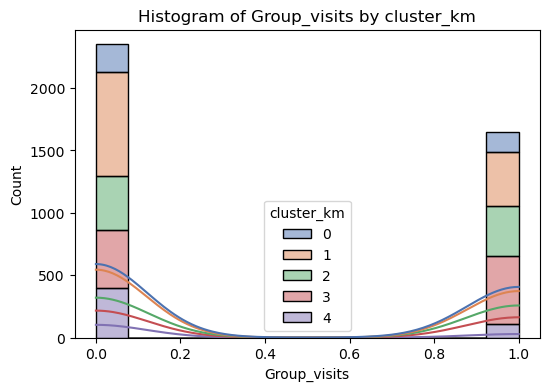

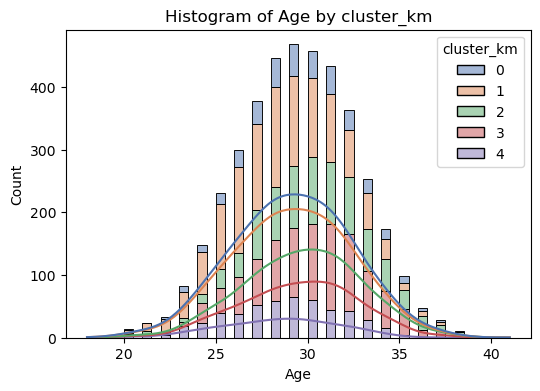

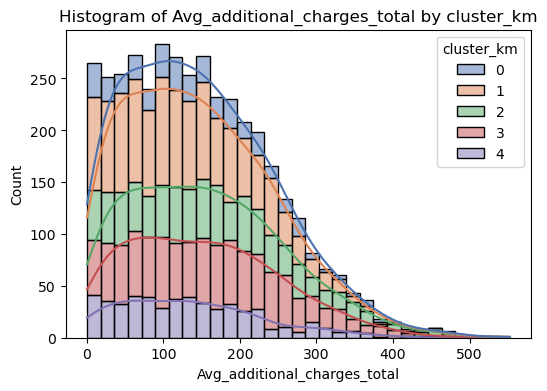

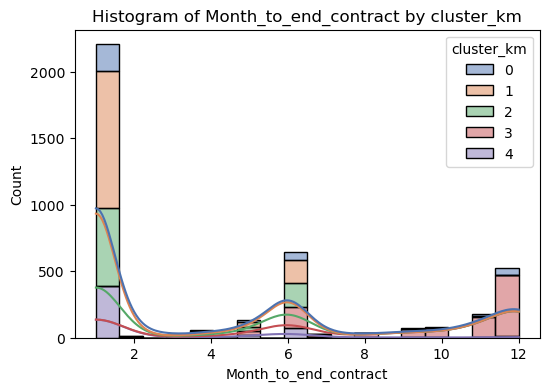

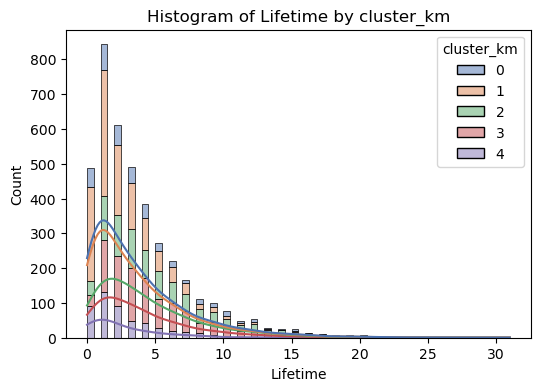

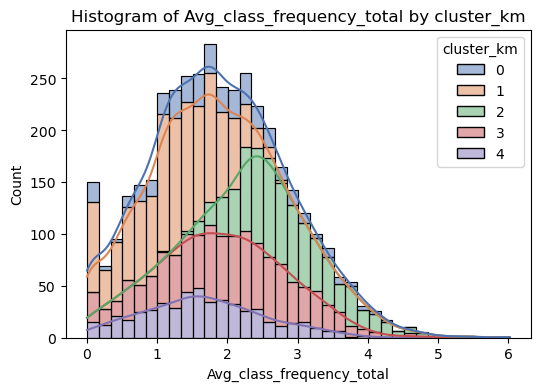

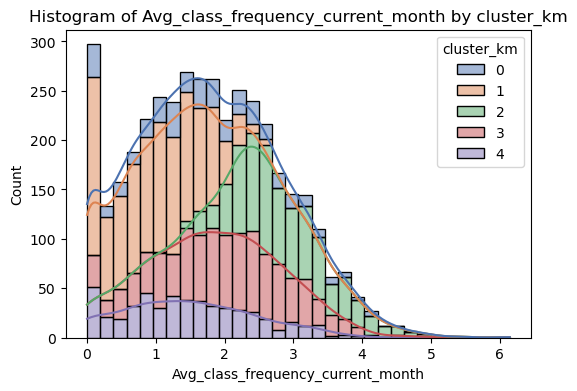

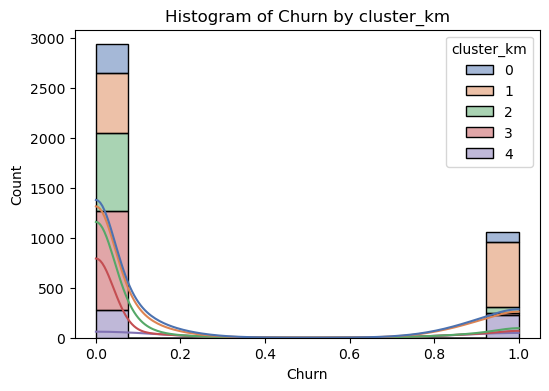

In [25]:
# Get the list of column names, excluding Churn
col_all = [col for col in gym.columns if col != 'cluster_km']

# Loop through each column and create a histogram with hue=Churn

for col in col_all:
    fig = plt.subplots(figsize =(6, 4))
    sns.histplot(data=gym, x=col, hue='cluster_km',kde=True,palette='deep',multiple='stack', alpha=0.5)
    plt.title(f'Histogram of {col} by cluster_km')
    plt.show()

**Summary**

Cluster 4 has the lowest for all features behind Cluster 3, Cluster 2,Cluster 1, and Cluster 0.

Lets calculate the churn rate for each cluster.

In [33]:
gym.groupby(['cluster_km'])['Churn'].mean()

cluster_km
0    0.267532
1    0.515898
2    0.067857
3    0.027695
4    0.442688
Name: Churn, dtype: float64

**Summary**

In average, Cluster 3 and Cluster 4 can be assumed are loyal and cluster 1 and cluster 4 are tends to leave.

# Conclusion and Recomendation

In conclusion, this project is to developing a customer interaction strategy based on analytical data. From the heatmap, the most obvious feature for target group are the contract_period, age, month_to_end_contract, avg_class_frequency_current_month. Increasing this in stats will give the big negative impact for the churn and positive impact to retention. From the analysis, cluster 1 and cluster 4 have the highest churn. The similarity for this 2 cluster are their average age where this 2 cluster have the lowest age among the other cluster. Therefore, suggestion to cut churn are increasing the target user age around 29 to 30. Increasing this age stat will give the big impact to churn and retention to the gym. Plus, user around this age looks comfortable with that gym for interaction with customers perspective.